In [44]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle


from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact, interactive, fixed, interact_manual
from utils import *

In [45]:
colors = [
    "#fcf444",  # light yellow/pastel yellow
    "#84fc04",  # lime green / neon green
    "#84b4b4",  # blue-green
    "#340cfc",  # deep blue / electric blue
    "#046ccc",  # cyan blue
    "#c0fcfc",  # light cyan
    "#88fcfc",  # very light cyan / soft turquoise
    "#6cb4cc",  # light sky blue / light cerulean blue
    "#dc1cfc",  # bright magenta / electric purple
    "#1005bc",  # deep blue
    "#dedede",  # light gray
    "#fc0c34"   # gainsboro
]

lithology = [
    "Sandstone (Arenito)",
    "Sandstone/Shale (Arenito)",
    "Shale (Argilito)",
    "Marl (Marga)",
    "Dolomite (Dolomita)",
    "Limestone (Calcário)",  
    "Chalk (Giz)",
    "Halite (Halita)",
    "Anhydrite (Anidrita)",
    "Tuff (Tufo)",
    "Coal (Carvão)",
    "Basement (Substrato)" 
]

In [46]:
dataset = pd.read_csv('Dados/train_dataset.csv',index_col=0)
dataset.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_num,FORMATION_num,LITHOLOGY
4238,15/9-13,1138.704,437640.84375,6470976.0,-1113.655396,NORDLAND GP.,Utsira Fm.,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,147.837677,30000,1.0,6,67,Sandstone (Arenito)
4239,15/9-13,1138.856,437640.84375,6470976.0,-1113.807373,NORDLAND GP.,Utsira Fm.,18.613674,1.088184,1.122706,1.800986,60.929138,0.800262,142.382431,65000,1.0,6,67,Shale (Argilito)
4240,15/9-13,1139.008,437640.84375,6470976.0,-1113.959473,NORDLAND GP.,Utsira Fm.,18.212072,1.127155,1.148141,1.817696,62.117264,0.765957,138.258331,65000,1.0,6,67,Shale (Argilito)
4241,15/9-13,1139.160,437640.84375,6470976.0,-1114.111450,NORDLAND GP.,Utsira Fm.,18.134182,1.141467,1.170984,1.829333,61.010860,0.702521,139.198914,65000,1.0,6,67,Shale (Argilito)
4242,15/9-13,1139.312,437640.84375,6470976.0,-1114.263428,NORDLAND GP.,Utsira Fm.,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,144.290085,65000,1.0,6,67,Shale (Argilito)


In [47]:
blind = pd.read_csv('Dados/blind_dataset.csv',index_col=0)
blind.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_num,FORMATION_num,LITHOLOGY
39541,15/9-17,1012.637998,438592.28125,6478953.0,-990.611145,NORDLAND GP.,Utsira Fm.,16.618269,0.673416,0.802095,1.923267,36.383289,0.536798,148.915009,65000,1.0,6,67,Shale (Argilito)
39542,15/9-17,1012.789998,438592.28125,6478953.0,-990.763123,NORDLAND GP.,Utsira Fm.,16.544796,0.682334,0.784069,1.908305,35.095161,0.537617,149.933502,65000,1.0,6,67,Shale (Argilito)
39543,15/9-17,1012.941998,438592.28125,6478953.0,-990.915161,NORDLAND GP.,Utsira Fm.,16.460545,0.687906,0.775306,1.914131,36.926651,0.548268,150.479660,30000,1.0,6,67,Sandstone (Arenito)
39544,15/9-17,1013.093998,438592.28125,6478953.0,-991.067139,NORDLAND GP.,Utsira Fm.,16.420191,0.682793,0.773167,1.930572,35.196995,0.526345,149.971573,30000,1.0,6,67,Sandstone (Arenito)
39545,15/9-17,1013.245998,438592.28125,6478953.0,-991.219116,NORDLAND GP.,Utsira Fm.,16.608219,0.674900,0.774900,1.958744,32.540020,0.501293,149.551514,30000,1.0,6,67,Sandstone (Arenito)


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542441 entries, 4238 to 1170446
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               542441 non-null  object 
 1   DEPTH_MD                           542441 non-null  float64
 2   X_LOC                              542441 non-null  float64
 3   Y_LOC                              542441 non-null  float64
 4   Z_LOC                              542441 non-null  float64
 5   GROUP                              542441 non-null  object 
 6   FORMATION                          542441 non-null  object 
 7   CALI                               542441 non-null  float64
 8   RMED                               542441 non-null  float64
 9   RDEP                               542441 non-null  float64
 10  RHOB                               542441 non-null  float64
 11  GR                                 54244

In [49]:
dataset.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_num,FORMATION_num
count,542441.000000,542441.000000,5.424410e+05,542441.000000,542441.000000,542441.000000,542441.000000,542441.000000,542441.000000,542441.000000,542441.000000,542441.000000,542441.000000,542441.000000,542441.000000
mean,2540.526122,485903.699714,6.680058e+06,-2483.902545,11.258609,4.896196,5.823748,2.351185,75.598528,0.332147,103.420826,60528.432471,1.113352,6.876691,37.269463
std,893.508933,35533.550396,1.370550e+05,866.391072,2.860925,27.164721,50.088318,0.220097,31.470648,0.127699,25.570621,14213.356114,0.358293,3.734455,20.095759
min,761.041604,426899.312500,6.406641e+06,-4889.749023,5.452346,0.095034,0.070418,1.058234,0.898921,-0.035822,7.415132,30000.000000,1.000000,0.000000,0.000000
25%,1849.488000,454126.687500,6.560844e+06,-3058.795654,8.678276,1.064462,1.014238,2.201713,54.987934,0.245016,83.736694,65000.000000,1.000000,3.000000,23.000000
50%,2417.802000,476895.406250,6.739877e+06,-2389.286865,11.727151,1.827411,1.684950,2.389775,75.702499,0.325185,97.029991,65000.000000,1.000000,7.000000,37.000000
75%,3136.473202,520153.187500,6.791160e+06,-1811.236084,12.690653,3.940886,3.508183,2.521849,92.719040,0.413487,121.928352,65000.000000,1.000000,9.000000,54.000000
max,4927.276000,572632.750000,6.856661e+06,-735.958557,25.717396,1988.616333,1999.877808,3.262041,1076.963867,0.999570,320.478882,99000.000000,3.000000,13.000000,68.000000


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542441 entries, 4238 to 1170446
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               542441 non-null  object 
 1   DEPTH_MD                           542441 non-null  float64
 2   X_LOC                              542441 non-null  float64
 3   Y_LOC                              542441 non-null  float64
 4   Z_LOC                              542441 non-null  float64
 5   GROUP                              542441 non-null  object 
 6   FORMATION                          542441 non-null  object 
 7   CALI                               542441 non-null  float64
 8   RMED                               542441 non-null  float64
 9   RDEP                               542441 non-null  float64
 10  RHOB                               542441 non-null  float64
 11  GR                                 54244

C:\Users\Acer3\AppData\Local\Temp\ipykernel_25356\610889806.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=85,fontsize=8)
C:\Users\Acer3\AppData\Local\Temp\ipykernel_25356\610889806.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=85,fontsize=8)


(0.0, 5000.0)

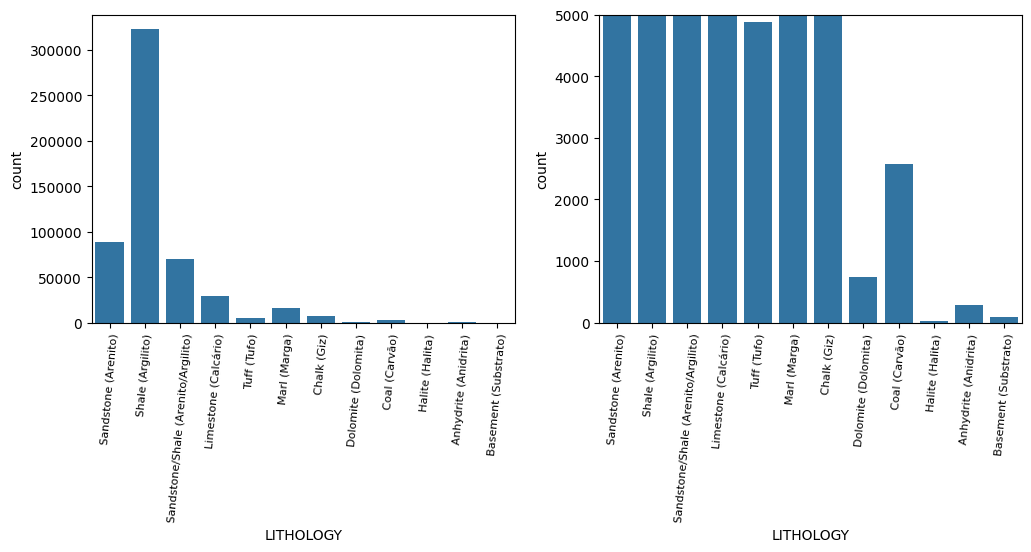

In [51]:
#### Fazendo a análise exploratória dos dados

#Verificando a distribuição das classes
fig,axes = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x='LITHOLOGY', data=dataset,ax=axes[0])

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=85,fontsize=8)

sns.countplot(x='LITHOLOGY', data=dataset,ax=axes[1])

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=85,fontsize=8)
axes[1].set_ylim(0,5000)

In [52]:
dataset.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC',
       'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'GROUP_num', 'FORMATION_num', 'LITHOLOGY'],
      dtype='object')

C:\Users\Acer3\AppData\Local\Temp\ipykernel_25356\3689267940.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Acer3\AppData\Local\Temp\ipykernel_25356\3689267940.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Acer3\AppData\Local\Temp\ipykernel_25356\3689267940.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Acer3\AppData\Local\Temp\ipykernel_25356\3689267940.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Acer3\AppData\Local\Temp\ipykernel_25356\3689267940.py:7: UserWarning: Matplotlib is currently using module

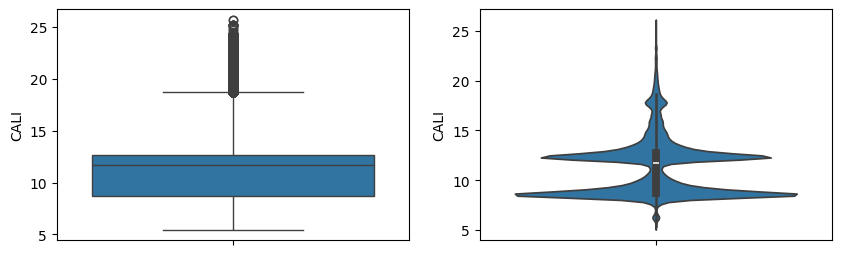

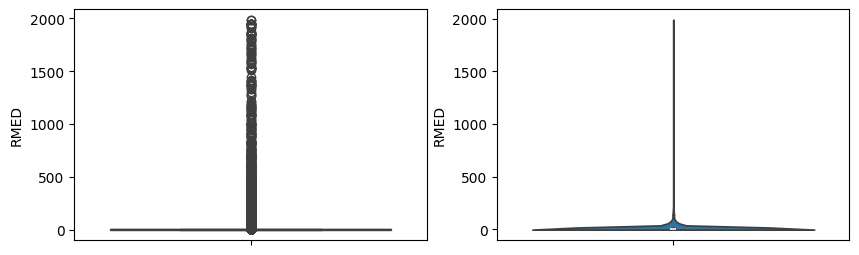

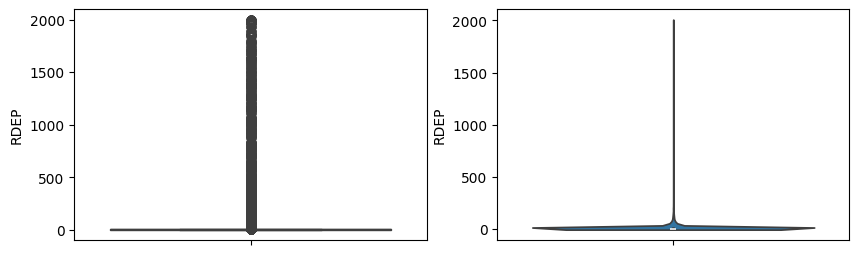

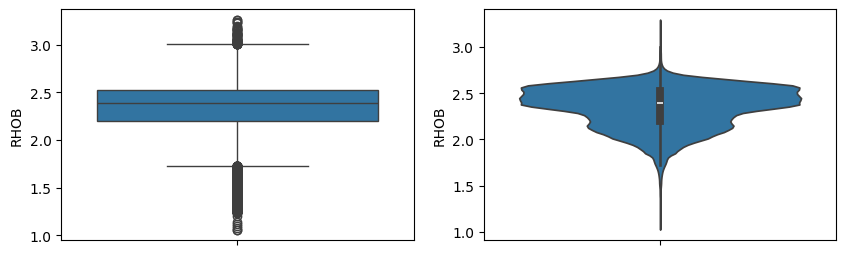

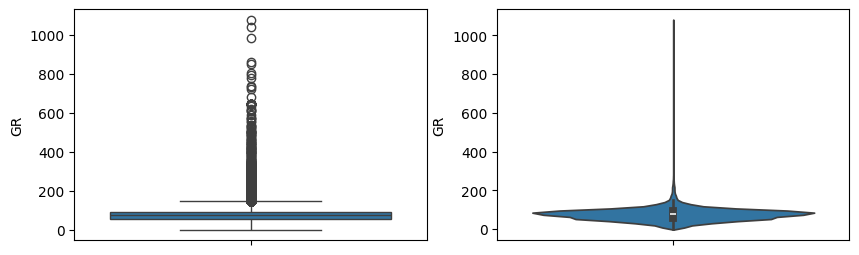

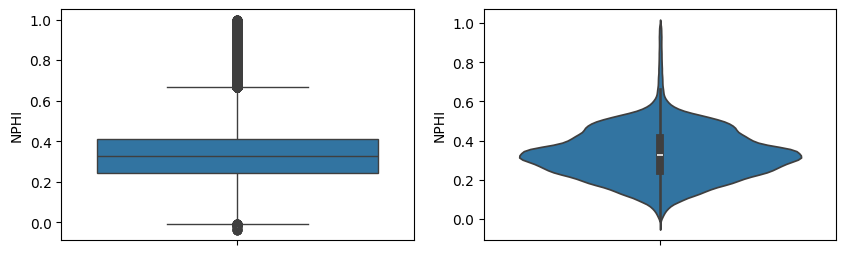

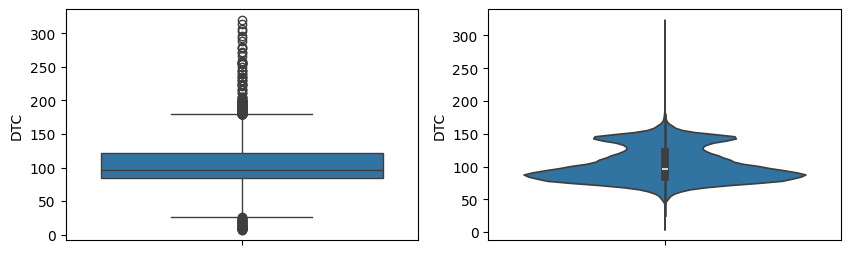

In [53]:
#Visualizando o boxplot das propriedades petrofísicas
cols = ['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC']
for i in cols:
    fig,axes = plt.subplots(ncols=2,figsize=(10,3))
    sns.boxplot(y=i,data=dataset,ax=axes[0])
    sns.violinplot(y=i,data=dataset,ax=axes[1])
    fig.show()

In [54]:
#Aplicando o log em nos perfis de resistividade
dataset['RMED_log'] = np.log10(dataset['RMED'])
dataset['RDEP_log'] = np.log10(dataset['RDEP'])

#Aplicando o log em nos perfis de resistividade
blind['RMED_log'] = np.log10(blind['RMED'])
blind['RDEP_log'] = np.log10(blind['RDEP'])

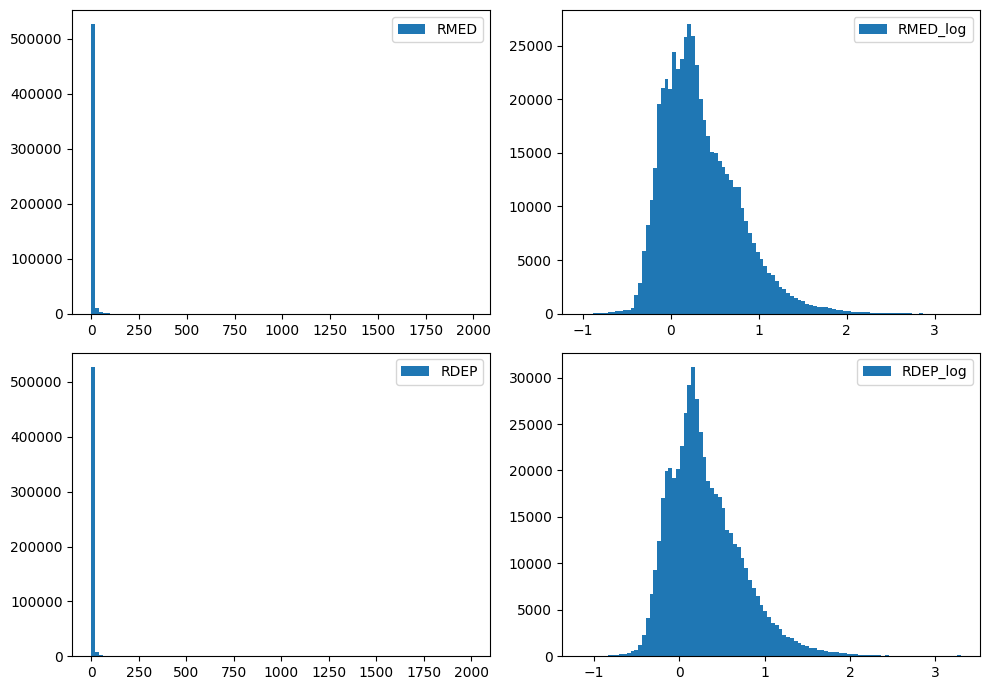

In [55]:
fig,axes = plt.subplots(2,2,figsize=(10,7))

axes[0][0].hist(dataset['RMED'],bins=100,label='RMED')
axes[0][1].hist(dataset['RMED_log'],bins=100,label='RMED_log')

axes[1][0].hist(dataset['RDEP'],bins=100,label='RDEP')
axes[1][1].hist(dataset['RDEP_log'],bins=100,label='RDEP_log')

for ax in axes:
    for ax1 in ax:
        ax1.legend()

fig.tight_layout()

C:\Users\Acer3\AppData\Local\Temp\ipykernel_25356\1288880149.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=85,fontsize=6)
C:\Users\Acer3\AppData\Local\Temp\ipykernel_25356\1288880149.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


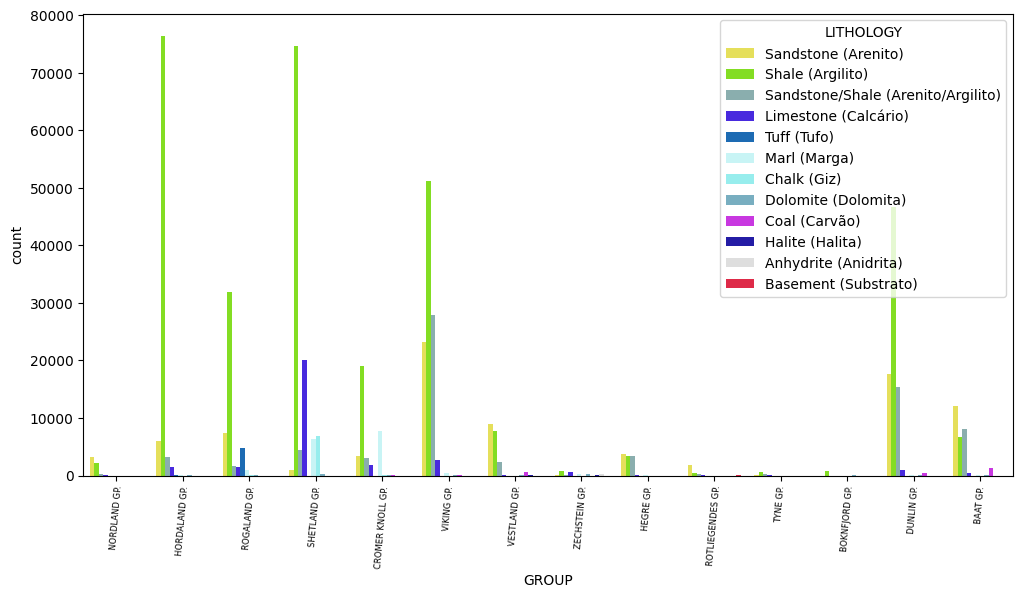

In [56]:
#Countplot das Formações com um hue=LITHOLOGY


fig,axes = plt.subplots(figsize=(12,6))

sns.countplot(x='GROUP', data=dataset,ax=axes,hue='LITHOLOGY',palette=colors)

axes.set_xticklabels(axes.get_xticklabels(), rotation=85,fontsize=6)

fig.show()

In [57]:
dataset.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,...,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_num,FORMATION_num,LITHOLOGY,RMED_log,RDEP_log
4238,15/9-13,1138.704,437640.84375,6470976.0,-1113.655396,NORDLAND GP.,Utsira Fm.,19.322735,1.013309,1.091499,...,55.892757,0.765867,147.837677,30000,1.0,6,67,Sandstone (Arenito),0.005742,0.038023
4239,15/9-13,1138.856,437640.84375,6470976.0,-1113.807373,NORDLAND GP.,Utsira Fm.,18.613674,1.088184,1.122706,...,60.929138,0.800262,142.382431,65000,1.0,6,67,Shale (Argilito),0.036703,0.050266
4240,15/9-13,1139.008,437640.84375,6470976.0,-1113.959473,NORDLAND GP.,Utsira Fm.,18.212072,1.127155,1.148141,...,62.117264,0.765957,138.258331,65000,1.0,6,67,Shale (Argilito),0.051984,0.059995
4241,15/9-13,1139.160,437640.84375,6470976.0,-1114.111450,NORDLAND GP.,Utsira Fm.,18.134182,1.141467,1.170984,...,61.010860,0.702521,139.198914,65000,1.0,6,67,Shale (Argilito),0.057463,0.068551
4242,15/9-13,1139.312,437640.84375,6470976.0,-1114.263428,NORDLAND GP.,Utsira Fm.,18.033762,1.138007,1.184080,...,58.501236,0.639708,144.290085,65000,1.0,6,67,Shale (Argilito),0.056145,0.073381


In [58]:
#Salvando o dataset com novas variáveis
dataset.to_csv('Dados/train_dataset_proc.csv')
blind.to_csv('Dados/blind_dataset_proc.csv')

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
scaler.fit(dataset[['X_LOC','Y_LOC','Z_LOC','CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC','RMED_log','RDEP_log']])

StandardScaler()

In [61]:
import umap

In [62]:
reducer = umap.UMAP(n_components=4,n_neighbors=100,n_epochs=500)

In [63]:
dataset[['X_LOC','Y_LOC','Z_LOC','CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC','RMED_log','RDEP_log']][::4]

,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,RMED_log,RDEP_log
4238,437640.84375,6470976.0,-1113.655396,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,147.837677,0.005742,0.038023
4242,437640.84375,6470976.0,-1114.263428,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,144.290085,0.056145,0.073381
4246,437640.84375,6470976.0,-1114.871338,18.441620,0.955811,1.145730,1.619630,52.008244,0.603731,163.404480,-0.019628,0.059082
4250,437640.84375,6470976.0,-1115.479248,19.081074,1.054557,1.107686,1.753598,61.225414,0.690551,153.057938,0.023070,0.044417
4254,437640.81250,6470976.0,-1116.087280,18.737488,1.153604,1.180301,1.803149,62.337303,0.563884,147.070740,0.062057,0.071993
...,...,...,...,...,...,...,...,...,...,...,...,...
1170430,444920.37500,6421578.5,-3096.901855,8.423200,0.453170,0.470535,2.273885,32.864208,0.159045,83.470078,-0.343739,-0.327409
1170434,444920.37500,6421578.5,-3097.509766,8.445835,0.619720,0.649203,2.331368,35.646126,0.153339,92.495476,-0.207804,-0.187619
1170438,444920.37500,6421578.5,-3098.117676,8.447601,0.863864,0.920779,2.379626,39.842899,0.161887,81.945084,-0.063555,-0.035845
1170442,444920.37500,6421578.5,-3098.725830,8.420886,0.789877,0.831749,2.327454,30.693535,0.165856,102.210472,-0.102440,-0.080008


reducer.fit(scaler.transform(dataset[['X_LOC','Y_LOC','Z_LOC','CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC','RMED_log','RDEP_log']]))

embedding = reducer.transform(scaler.transform(dataset[['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC','RMED_log','RDEP_log']]))

In [64]:
embedding.shape

NameError: name 'embedding' is not defined

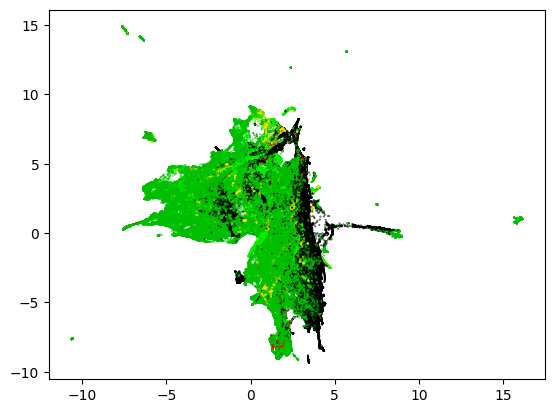

In [109]:
plt.scatter(embedding[:, 0], embedding[:, 3], c=dataset['FORCE_2020_LITHOFACIES_LITHOLOGY'], cmap='nipy_spectral', s=0.1)